In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud 
from PIL import Image

한글 깨짐 방지

In [ ]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

__경로 지정__

In [66]:
path='파일 경로'

In [ ]:
img_path='이미지 경로'

__데이터 로드__

In [ ]:
import ast

Trump_corpus = pd.read_csv(path+'전처리 완료 파일명')
Biden_corpus = pd.read_csv(path+'전처리 완료 파일명')

Trump_corpus = ast.literal_eval(Trump_corpus)
Biden_corpus = ast.literal_eval(Biden_corpus)

__TF-IDF 생성 및 워드 클라우드 출력 (Trump)__

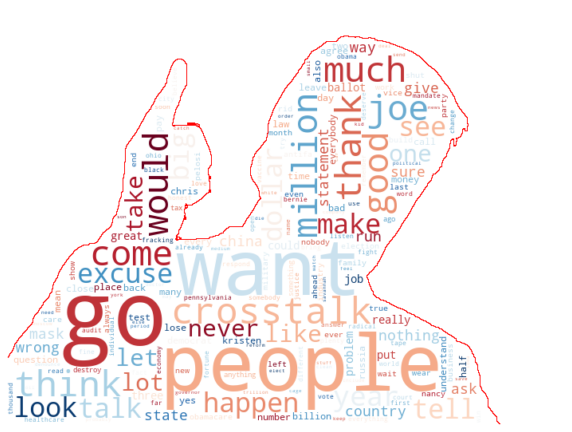

In [114]:
Trump_tfidfv = TfidfVectorizer(min_df=1).fit(Trump_corpus)
Trump_TFIDF_matrix = Trump_tfidfv.transform(Trump_corpus).toarray()

Trump_index_word = {idx:word for (word,idx) in Trump_tfidfv.vocabulary_.items()}

Trump_TFIDF_sum = Trump_TFIDF_matrix.sum(axis=0)

Trump_frequencies = {Trump_index_word[i]:Trump_TFIDF_sum[i] for i in range(len(Trump_tfidfv.vocabulary_))}

icon = Image.open(img_path+"trump_mask.png")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
trump_mask = np.array(mask)

wordcloud = WordCloud(relative_scaling = 0.2,
                      background_color='white',
                      width = 800,
                      height = 800,
                      colormap='RdBu',
                      mask=trump_mask,
                      contour_width=1, 
                      contour_color='red'
                     ).generate_from_frequencies(Trump_frequencies)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file(img_path+'Trump_debate_wc.png')

__TF-IDF 생성 및 워드 클라우드 출력(Biden)__

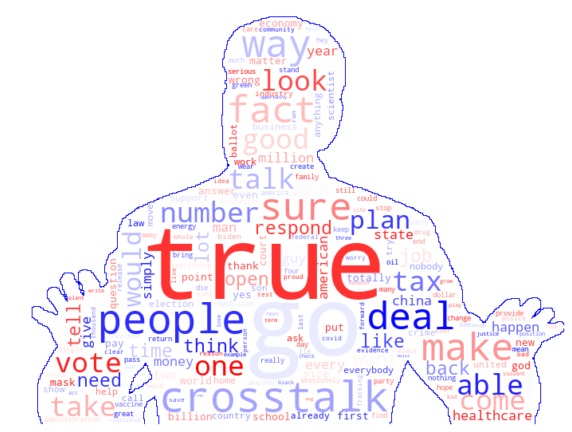

In [115]:
Biden_tfidfv = TfidfVectorizer(min_df=1).fit(Biden_corpus)
Biden_TFIDF_matrix = Biden_tfidfv.transform(Biden_corpus).toarray()

Biden_index_word = {idx:word for (word,idx) in Biden_tfidfv.vocabulary_.items()}

Biden_TFIDF_sum = Biden_TFIDF_matrix.sum(axis=0)

Biden_frequencies = {Biden_index_word[i]:Biden_TFIDF_sum[i] for i in range(len(Biden_tfidfv.vocabulary_))}

icon = Image.open(img_path+"biden_mask.png")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
biden_mask = np.array(mask)

wordcloud = WordCloud(relative_scaling = 0.2,
                      background_color='white',
                      width = 800,
                      height = 800,
                      colormap='bwr',
                      mask=biden_mask,
                      contour_width=1, 
                      contour_color='blue'
                     ).generate_from_frequencies(Biden_frequencies)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file(img_path+'Biden_debate_wc.png')

### LDA

In [82]:
from sklearn.decomposition import LatentDirichletAllocation

In [83]:
Trump_LDA=LatentDirichletAllocation(n_components=3,learning_method='online',random_state=1120,max_iter=2)
Trump_LDA.fit_transform(Trump_TFIDF_matrix)


word_set = Trump_tfidfv.get_feature_names() 

def get_topics(components, feature_names, n=6):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

        
get_topics(Trump_LDA.components_,word_set)

Topic 1: [('excuse', 8.64), ('crosstalk', 7.89), ('sure', 6.59), ('statement', 4.98), ('make', 3.97), ('big', 3.34)]
Topic 2: [('say', 17.73), ('get', 12.45), ('go', 12.41), ('know', 11.38), ('people', 10.07), ('would', 9.56)]
Topic 3: [('thank', 20.42), ('know', 9.56), ('much', 8.56), ('want', 8.48), ('good', 6.58), ('think', 5.91)]


In [84]:
Biden_LDA=LatentDirichletAllocation(n_components=3,learning_method='online',random_state=1120,max_iter=2)
Biden_LDA.fit_transform(Biden_TFIDF_matrix)


word_set = Biden_tfidfv.get_feature_names() 

def get_topics(components, feature_names, n=6):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

        
get_topics(Biden_LDA.components_,word_set)

Topic 1: [('crosstalk', 11.07), ('say', 8.83), ('know', 8.35), ('deal', 3.52), ('wrong', 2.81), ('yes', 2.75)]
Topic 2: [('true', 14.37), ('get', 8.03), ('go', 7.04), ('sure', 6.86), ('people', 6.27), ('talk', 5.15)]
Topic 3: [('go', 6.58), ('way', 5.2), ('good', 5.19), ('people', 5.11), ('number', 5.1), ('say', 5.0)]


In [85]:
from IPython.display import HTML
display(HTML('<marquee direction="down" width=100% height=300 behavior="alternate" >\
             <marquee height=300 style = "color: red; font-size : 100px;" behavior="alternate" >\
    <b>Trump vs. Biden!</b>\
             </marquee>\
             </marquee>'))